In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.animation as animation

import seaborn as sns;
from skimage.transform import rescale, resize, downscale_local_mean

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import cv2 
from sklearn.metrics import confusion_matrix

In [2]:
from PIL import Image
import glob
image_listA1 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A1.png')):
    im=Image.open(filename).convert('L')
    image_listA1.append(np.array(im).flatten())

In [3]:
image_listA2 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A2.png')):
    im=Image.open(filename).convert('L')
    image_listA2.append(np.array(im).flatten())

In [4]:
image_listA3 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A3.png')):
    im=Image.open(filename).convert('L')
    image_listA3.append(np.array(im).flatten())

In [5]:
image_listA4 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A4.png')):
    im=Image.open(filename).convert('L')
    image_listA4.append(np.array(im).flatten())

In [6]:
image_listA5 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A5.png')):
    im=Image.open(filename).convert('L')
    image_listA5.append(np.array(im).flatten())

In [7]:
image_listA6 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/A/*A6.png')):
    im=Image.open(filename).convert('L')
    image_listA6.append(np.array(im).flatten())

In [8]:
image_listB1 = []

for filename in sorted(glob.glob('/Users/Airton/Desktop/Data/B/*B1.png')):
    im=Image.open(filename).convert('L')
    image_listB1.append(np.array(im).flatten())

In [9]:
print(type(image_listA1[0]))

<class 'numpy.ndarray'>


In [10]:
print(len(image_listB1))
print(len(image_listA1))
print(image_listA1[0][65535])

57
57
35


In [ ]:
plt.imshow(image_listA1[0].reshape(256,256),cmap="gray")
plt.show()

In [ ]:
plt.imshow(image_listA6[0])
plt.show()

In [ ]:
plt.imshow(image_listB1[0])
plt.show()

In [9]:
Inputs = []
Radar = []
for i in range(len(image_listA1)):
    for j in range(len(image_listA1[0])):
        x = []
        x.append(image_listA1[i][j])
        x.append(image_listA2[i][j])
        x.append(image_listA3[i][j])
        x.append(image_listA4[i][j])
        x.append(image_listA5[i][j])
        x.append(image_listA6[i][j])
        
        Radar.append(image_listB1[i][j])
        
        Inputs.append(x)

In [10]:
Inputs = np.array(Inputs)
Radar = np.array(Radar)

In [ ]:
print(Inputs.shape)
print(Radar.shape)

In [15]:
Input = np.concatenate((image_listA1,image_listA2,image_listA3,image_listA4,image_listA5,image_listA6),axis=1)
print(len(Input[0]))

393216


In [ ]:
plt.imshow(Input[0])
plt.show()

In [ ]:
print((Input[0][1]))

In [ ]:
flattened_listt = []
for index in range(len(Input)):
    for pixel in range(256): 
        flattened = Input[index][pixel].flatten()
        flattened_listt.append(flattened.tolist())
ftry = np.array(flattened_listt).reshape(-1,1)
print(len(ftry))

In [ ]:
def flatten(listin):
    flattened_list = []
    for index in range(len(listin)):
        for pixel in range(256): 
            flattened = listin[index][pixel].flatten()
            flattened_list.append(flattened.tolist())
    return flattened_list

In [ ]:
FlatInput = np.array(flatten(Input)).reshape(-1,1)
FlatRadar = np.array(flatten(image_listB1)).reshape(-1,1)
print(len(FlatRadar))
print(len(FlatInput))
print(FlatInput[1024])
print(FlatRadar[1024])

In [ ]:
'''
Linear Regression
'''
train_x = FlatInput[:-58368]
train_y = FlatRadar[:-58368]
test_x = FlatInput[-58368:]
test_y = FlatRadar[-58368:]

regr = linear_model.LinearRegression(normalize=False)

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the testing set
y_pred = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, y_pred))
print("Calculated mean squared error", np.mean(y_pred - test_y)**2)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred))
print('Intercept: ', regr.intercept_)
# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
'''
Linear Regression
'''
train_x = Inputs[:-65536]
train_y = Radar[:-65536]
test_x = Inputs[-65536:]
test_y = Radar[-65536:]
regr = linear_model.LinearRegression(normalize=False)

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the testing set
y_pred = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, y_pred))
print("Calculated mean squared error", np.mean(y_pred - test_y)**2)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred))
print('Intercept: ', regr.intercept_)

Coefficients: 
 [ 0.00658671 -0.04822761 -0.05972578 -0.00197233  0.00765351 -0.00489003]
Mean squared error: 106.34
Calculated mean squared error 1.1012530163773546
Variance score: 0.03
Intercept:  23.999517756175344


In [ ]:
# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
print(test_x.size)
print(test_y.size)

In [ ]:
resh = np.array(image_listA1).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
resh = np.array(image_listA2).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
resh = np.array(image_listA3).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
resh = np.array(image_listA4).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
resh = np.array(image_listA5).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

In [ ]:
resh = np.array(image_listA6).reshape(-1,1)
plt.imshow(resh[-65536:].reshape(256, 256), cmap='gray')
plt.show()

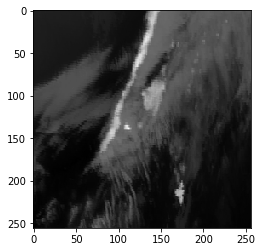

In [12]:
plt.imshow(y_pred.reshape(256, 256), cmap='gray')
plt.show()

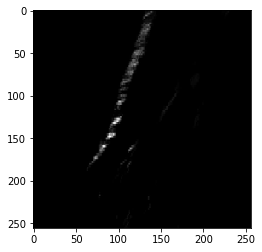

In [13]:
plt.imshow(test_y.reshape(256, 256), cmap='gray')
plt.show()

In [15]:
input_names = ["Sat Band 2","Sat Band 6","Mod Visibility Feature","Mod Relative Humidity Feature","Mod Specific Humidty Feature","Mod Temperature at the surface Feature"]
X_names = np.asarray(input_names)

In [16]:
regr.coef_

array([ 0.00658671, -0.04822761, -0.05972578, -0.00197233,  0.00765351,
       -0.00489003])

In [17]:
for feat, coef in zip(X_names, regr.coef_):
    print('{}       {}'.format(feat, coef))

Sat Band 2       0.006586711492964128
Sat Band 6       -0.04822761350660772
Mod Visibility Feature       -0.05972577518858085
Mod Relative Humidity Feature       -0.001972327680450401
Mod Specific Humidty Feature       0.007653508527873743
Mod Temperature at the surface Feature       -0.0048900269513936995


In [18]:
df = pd.DataFrame({'Features':input_names, 'coeff':abs(regr.coef_)})

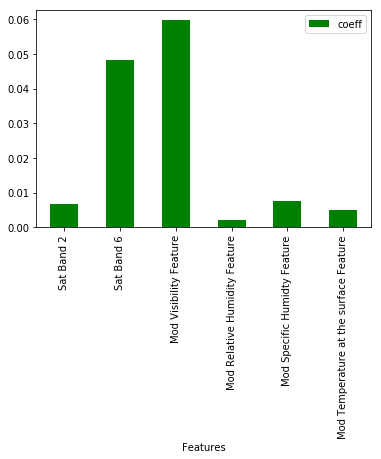

In [19]:
df.plot.bar(x='Features', y='coeff',rot=90, color=("g"))
plt.show()

In [15]:
Output = y_pred.reshape(256, 256)
Original = test_y.reshape(256, 256)

In [22]:
th1 = cv2.threshold(Output,15,255,cv2.THRESH_BINARY)
th2 = cv2.threshold(Original,15,255,cv2.THRESH_BINARY)
FR = list(th1[1].flatten())
FF = list(th2[1].flatten())

In [148]:
tn,fp,fn,tp=confusion_matrix(FR, FF).ravel()
print(tn,fp,fn,tp)

64161 1309 48 18


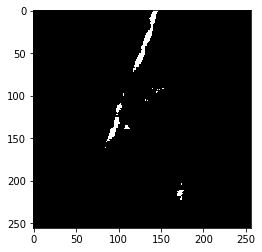

In [23]:
plt.imshow(th1[1],cmap = 'gray')
plt.show()

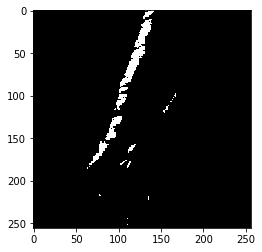

In [24]:
plt.imshow(th2[1],cmap = 'gray')
plt.show()

In [38]:
Total = tn+fp+fn+tp
print(Total)

65536


In [39]:
PTN = (tn/Total)*100
PFP = (fp/Total)*100
PFN = (fn/Total)*100
PTP = (tp/Total)*100

In [41]:
print(PTN,PFP,PFN,PTP)

46.0174560546875 0.6744384765625 49.2950439453125 4.0130615234375


In [32]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  50.030517578125  Wrong =  49.969482421875


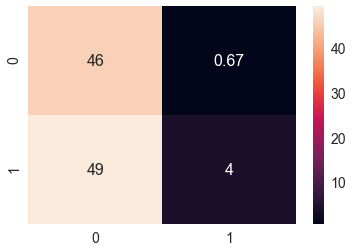

In [83]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFP],
        [PFN,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [53]:
NN = fn+tn
NP = fp+tp

In [54]:
NPTN = (tn/NN)
NPFP = (fp/NP)
NPFN = (fn/NN)
NPTP = (tp/NP)

In [56]:
print(NPFN)

0.5171939036885246


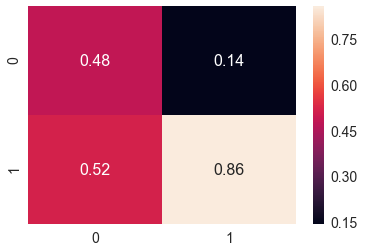

In [82]:
array = [[NPTN,NPFP],[NPFN,NPTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

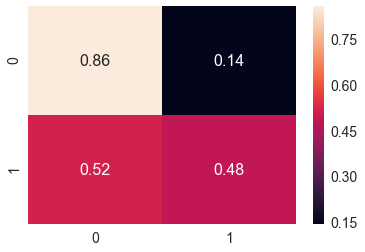

In [64]:
array = [[NPTP,NPFP],[NPFN,NPTN]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

# Checking different thresholds 

In [61]:
TC = []
for i in range(1,21):
    th1 = cv2.threshold(Output,i,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(Original,i,255,cv2.THRESH_BINARY)
    FR = list(th1[1].flatten())
    FF = list(th2[1].flatten())
    tn,fp,fn,tp=confusion_matrix(FR, FF).ravel()
    TC.append([tn,fp,fn,tp])

In [62]:
print(len(TC))
print(TC)

20
[[30158, 442, 32306, 2630], [34635, 556, 28059, 2286], [38884, 671, 23999, 1982], [42715, 777, 20331, 1713], [46767, 864, 16410, 1495], [51960, 981, 11338, 1257], [57261, 1100, 6160, 1015], [60047, 1126, 3489, 874], [61896, 1112, 1738, 790], [62200, 1119, 1503, 714], [62450, 1142, 1328, 616], [62707, 1159, 1132, 538], [62994, 1185, 898, 459], [63295, 1231, 634, 376], [63579, 1243, 408, 306], [63732, 1274, 294, 236], [63900, 1295, 184, 157], [64003, 1331, 118, 84], [64091, 1326, 75, 44], [64161, 1309, 48, 18]]


In [72]:
PTC = []
for i in range(20):
    Total = TC[i][0]+TC[i][1]+TC[i][2]+TC[i][3]
    PTN = (TC[i][0]/Total)*100
    PFP = (TC[i][1]/Total)*100
    PFN = (TC[i][2]/Total)*100
    PTP = (TC[i][3]/Total)*100
    PTC.append([PTN,PFP,PFN,PTP])

In [73]:
print(len(PTC))
print(PTC)

20
[[46.0174560546875, 0.6744384765625, 49.2950439453125, 4.0130615234375], [52.84881591796875, 0.848388671875, 42.81463623046875, 3.4881591796875], [59.332275390625, 1.02386474609375, 36.61956787109375, 3.0242919921875], [65.17791748046875, 1.18560791015625, 31.02264404296875, 2.61383056640625], [71.36077880859375, 1.318359375, 25.0396728515625, 2.28118896484375], [79.28466796875, 1.49688720703125, 17.3004150390625, 1.91802978515625], [87.37335205078125, 1.678466796875, 9.3994140625, 1.54876708984375], [91.62445068359375, 1.7181396484375, 5.32379150390625, 1.3336181640625], [94.44580078125, 1.69677734375, 2.6519775390625, 1.2054443359375], [94.90966796875, 1.70745849609375, 2.29339599609375, 1.0894775390625], [95.2911376953125, 1.7425537109375, 2.0263671875, 0.93994140625], [95.68328857421875, 1.76849365234375, 1.727294921875, 0.8209228515625], [96.1212158203125, 1.80816650390625, 1.3702392578125, 0.70037841796875], [96.58050537109375, 1.87835693359375, 0.9674072265625, 0.57373046875]

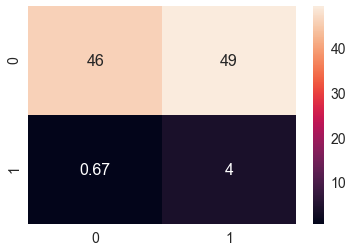

In [70]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFN],
        [PFP,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size